# CAP 5768 - Data Science - Dr. Marques - Fall 2019

## Assignment 4: Statistical analysis - Part 2
## Starter code

### Goals 

- To practice the computation and displaying of representative statistical distributions.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets.
- To compute moments and skewness measures.
- To increase our statistical analysis skills.
- To estimate the parameters of a distribution and propose a model that explains the underlying data.


### Instructions

- This assignment is structured in 3 parts, each one using their own dataset(s).
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 142 (plus up to 40 bonus points).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import random
import math
import statistics 
import scipy

#import thinkstats2
#import thinkplot

-------------------
## Part 1: Representative analytic distributions

In this part we will look at how to generate and plot analytic distributions.

The Python code below generates and plots the PDF and CDF of a normal (Gaussian) distribution whose parameters are *mu* and *sigma*.

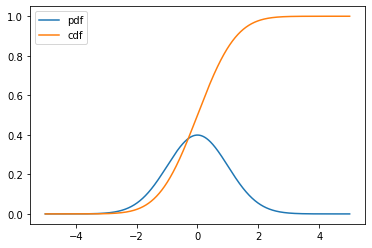

In [2]:
x = np.linspace(-5, 5, 5000)
mu = 0
sigma = 1

y_pdf = ss.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = ss.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend();

## Your turn! (12 points, i.e., 6 pts each)

Write code to:

1. Plot the PDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot. 
They will probably look like this:
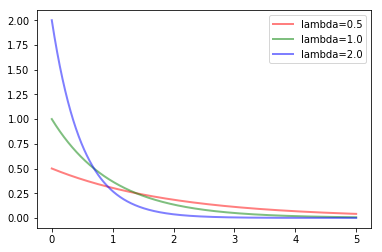

2. Plot the CDF of three exponential distributions (with *lambda* equal to 0.5, 1, and 2) on the same plot.
They will probably look like this:
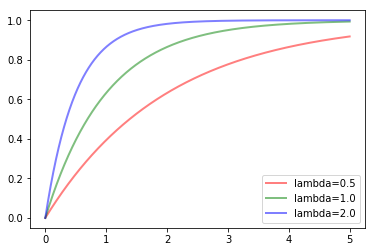

## Solution

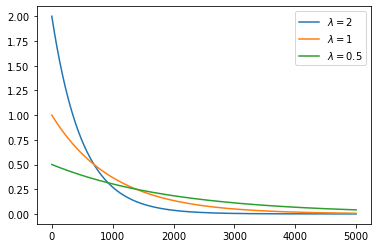

In [3]:
x = np.linspace(0, 5, 5000)
for lam in [2.0, 1, 0.5]:
        pdf = ss.expon.pdf(x, 0, 1/lam)
        label = r'$\lambda=%g$' % lam
        plt.plot(pdf, label=label)
        plt.legend();

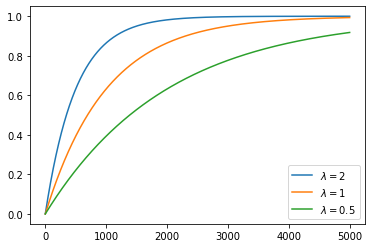

In [4]:
x = np.linspace(0, 5, 5000)
for lam in [2.0, 1, 0.5]:
        cdf = ss.expon.cdf(x, 0, 1/lam)
        label = r'$\lambda=%g$' % lam
        plt.plot(cdf, label=label)
        plt.legend();

-------------------
## Part 2: Empirical distributions vs. analytic distributions

The question we are trying to answer in this part is: **How well can we model empirical distributions with analytic distributions?**

Let's start by asking the question **Are the Belmont Stakes results normally distributed?**

*For context: Since 1926, the Belmont Stakes is a 1.5 mile-long race of 3-year old thoroughbred horses. Secretariat ran the fastest Belmont Stakes in history in 1973. While that was the fastest year, 1970 was the slowest because of unusually wet and sloppy conditions. These two outliers have been removed from the data set, which has been obtained by scraping the Belmont Wikipedia page.* (The file ``belmont.csv`` is available on Canvas, if you want to learn more about the race's results.)

The code below:
- computes mean and standard deviation of Belmont winners' times with the two outliers removed.
- takes 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- computes the CDF of the theoretical samples and the ECDF of the Belmont winners' data, assigning the results to x_theor, y_theor and x, y, respectively.
- plots the CDF of your samples with the ECDF, with labeled axes.

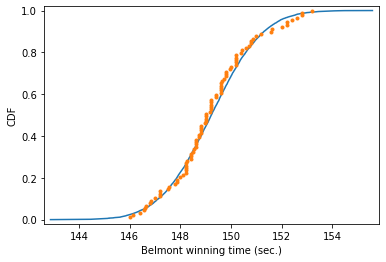

In [5]:
import numpy as np
import matplotlib.pyplot as plt

belmont_no_outliers = np.array([148.51,  146.65,  148.52,  150.7,  150.42,  150.88,  151.57,
                                147.54,  149.65,  148.74,  147.86,  148.75,  147.5,  148.26,
                                149.71,  146.56,  151.19,  147.88,  149.16,  148.82,  148.96,
                                152.02,  146.82,  149.97,  146.13,  148.1,  147.2,  146.,
                                146.4,  148.2,  149.8,  147.,  147.2,  147.8,  148.2,
                                149.,  149.8,  148.6,  146.8,  149.6,  149.,  148.2,
                                149.2,  148.,  150.4,  148.8,  147.2,  148.8,  149.6,
                                148.4,  148.4,  150.2,  148.8,  149.2,  149.2,  148.4,
                                150.2,  146.6,  149.8,  149.,  150.8,  148.6,  150.2,
                                149.,  148.6,  150.2,  148.2,  149.4,  150.8,  150.2,
                                152.2,  148.2,  149.2,  151.,  149.6,  149.6,  149.4,
                                148.6,  150.,  150.6,  149.2,  152.6,  152.8,  149.6,
                                151.6,  152.8,  153.2,  152.4,  152.2])

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n

    return x, y

# Seed random number generator
np.random.seed(42)

# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

## Questions 1-2 (6 points, i.e., 3 pts each)

1. Does the empirical distribution of the data resemble a normal distribution? 
2. What other *plots* could you produce to better investigate (visually) the claim that the Belmont Stakes results are normally distributed? 

## Solution

1. Does the empirical distribution of the data resemble a normal distribution?
#### Data looks like normally distributed except a few light tails.

Text(0, 0.5, 'Frequency')

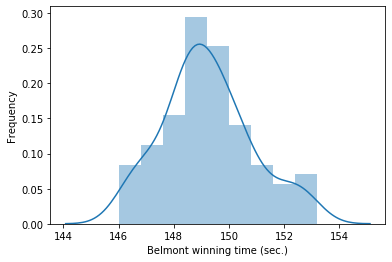

In [6]:
# 2. What other plots could you produce to better investigate (visually) the claim that 
# the Belmont Stakes results are normally distributed?
# Compute number of data points: n_data
n_data= len(belmont_no_outliers)
# Number of bins is the square root of number of data points: n_bins
n_bins= np.sqrt(n_data)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)
sns.distplot(belmont_no_outliers,bins=n_bins, hist=True, rug=False);
plt.xlabel('Belmont winning time (sec.)')
plt.ylabel('Frequency')

## BONUS (20 points)

Let's try to answer the question: **What are the chances of a horse matching or beating Secretariat's record?**

Assuming that the Belmont winners' times are Normally distributed (with the 1970
and 1973 years removed), write Python code to answer the question: *What is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?*

Instructions:
- Take 1,000,000 samples from the normal distribution using the ``np.random.normal()`` function.
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``belmont_no_outliers`` array. 
- Compute the fraction of samples that have a time less than or equal to Secretariat's time of 144 seconds.
- Print the result.

## Solution

In [7]:
# Take 1,000,000 samples from the normal.
samples = np.random.normal(mu, sigma, 1000000)

# Compute the mean mu and standard deviation sigma from the belmont_no_outliers array.
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Compute the fraction that are faster than 144 seconds: prob
prob = len(samples[np.where(samples <= 144)]) / len(samples)

# Print the result
print('Probability of fastest Secretariat:', prob)

Probability of fastest Secretariat: 0.000593


## Your turn (30 points)

Let's investigate whether the speed of light measurements by Michelson are normally distributed.

The dataset (``michelson_speed_of_light.csv``) is available on Canvas. 
Hint: You are only interested in the *velocity of light in air (km/s)* column.

You should follow a similar sequence of steps as above, namely:
- Compute the mean ``mu`` and standard deviation ``sigma`` from the ``michelson_speed_of_light`` array. 
- Take 10,000 samples out of a normal distribution with this mean and standard deviation using
``np.random.normal()``.
- Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
- Plot the CDF of your samples with the ECDF, with labeled axes.

For more on Michelson: https://en.wikipedia.org/wiki/Albert_A._Michelson

## Solution

In [8]:
# Data Uploads
file = 'michelson_speed_of_light.csv'
michelson_speed_of_light_read = pd.read_csv(file) 
michelson_speed_of_light = np.array(michelson_speed_of_light_read['velocity of light in air (km/s)'])
print(michelson_speed_of_light)

[299850 299740 299900 300070 299930 299850 299950 299980 299980 299880
 300000 299980 299930 299650 299760 299810 300000 300000 299960 299960
 299960 299940 299960 299940 299880 299800 299850 299880 299900 299840
 299830 299790 299810 299880 299880 299830 299800 299790 299760 299800
 299880 299880 299880 299860 299720 299720 299620 299860 299970 299950
 299880 299910 299850 299870 299840 299840 299850 299840 299840 299840
 299890 299810 299810 299820 299800 299770 299760 299740 299750 299760
 299910 299920 299890 299860 299880 299720 299840 299850 299850 299780
 299890 299840 299780 299810 299760 299810 299790 299810 299820 299850
 299870 299870 299810 299740 299810 299940 299950 299800 299810 299870]


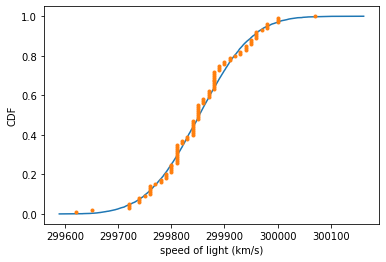

In [9]:
# Compute the mean mu and standard deviation sigma from the michelson_speed_of_light array.
import numpy as np
mean = np.mean(michelson_speed_of_light)
std = np.std(michelson_speed_of_light)

#ake 10,000 samples out of a normal distribution with this mean and standard deviation using np.random.normal()
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(michelson_speed_of_light)

# Compute the CDF of the theoretical samples and the ECDF of the Michelson speed of light data.
x_theor, y_theor = ecdf(samples)

# Plot the CDF of your samples with the ECDF, with labeled axes.
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set()
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('speed of light (km/s)')
plt.ylabel('CDF')
plt.show()

## Questions 3-4 (6 points, i.e., 3 pts each)

3. Does the empirical distribution of the data resemble a normal distribution? 
4. What other *plots* could you produce to better investigate (visually) the claim that the Michelson speed of light measurements are normally distributed? 

## Solution

3. Does the empirical distribution of the data resemble a normal distribution?
#### Data looks like normally distributed except a few light tails and hinges.

Text(0, 0.5, 'Frequency')

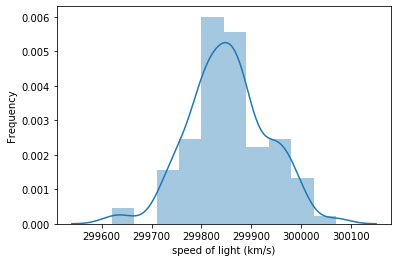

In [10]:
# 4. What other plots could you produce to better investigate (visually) the claim that 
# the Michelson speed of light measurements are normally distributed?
# Compute number of data points: n_data
n_data= len(michelson_speed_of_light)
# Number of bins is the square root of number of data points: n_bins
n_bins= np.sqrt(n_data)
# Convert number of bins to integer: n_bins
n_bins = int(n_bins)
#plt.plot(samples, norm.pdf(samples))
sns.distplot(michelson_speed_of_light,bins=n_bins, hist=True, rug=False);
plt.xlabel('speed of light (km/s)')
plt.ylabel('Frequency')

## Your turn (30 points)

Next, let's turn our attention to baby births.

In the real world, exponential distributions come up when we look at a series of events and measure the times between events, called *interarrival times*. If the events are equally likely to occur at any time, the distribution of interarrival times tends to look like an exponential distribution.

We will use the dataset from ``babies_brisbane.csv`` containing information about the time of birth for  44 babies born in a hospital in Brisbane, Australia, on December 18, 1997, as reported in the local paper. 

You should write code to:
1. Read the data and build a Pandas dataframe.
2. Compute the reciprocal of the mean of the sample exponential distribution (call this ``lam``, since ``lambda`` is a reserved word in Python).
3. Take 10,000 samples out of an exponential distribution with this scale using
``np.random.exponential()``.
4. Compute the CDF of the theoretical samples and the ECDF of the sample data, assigning the results to ``x_theor``, ``y_theor`` and ``x, y``, respectively.
5. Plot the CDF of your samples with the ECDF, with labeled axes.
6. Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, on a log-y scale. (See Figure 5-2 in the textbook)

## Solution

In [13]:
# 1. Read the data and build a Pandas dataframe.
babies_brisbane = pd.read_csv('babies_brisbane.csv')
babies_brisbane.describe()
interarrival_times = np.array(babies_brisbane['time'])

# 2. Compute the reciprocal of the mean of the sample exponential distribution.
mean = np.mean(interarrival_times)
lam=1/mean
diffs = np.diff(interarrival_times)

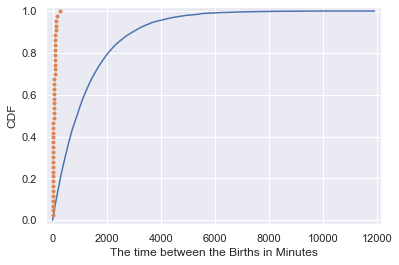

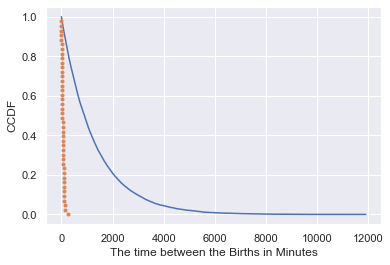

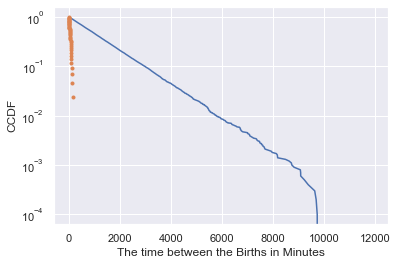

In [14]:
def ecdf (data):
    """Compute  CCDF for one dimentional array of measurement"""
    # Total Number of Data Points:n
    n =len (data)
    # X-data for the ECDF: x
    x =np.sort (data)
    # Y-data for the ECDF: y
    y = np.arange(1, n+1)/n
    return x, y
mean = np.mean (diffs)
std  = np.std  (diffs)

# 3. Take 10,000 samples out of an exponential distribution
samples = np.random.exponential(1/lam, size=10000)
    
# 4.  Compute the CDF of the theoretical samples and the ECDF of the sample data
x, y = ecdf(diffs)
x_theor, y_theor = ecdf(samples)

# 5.Plot the CDF of your samples with the ECDF, with labeled axes.
sns.set()
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('The time between the Births in Minutes')
plt.ylabel('CDF')
plt.show()

y_c=1-y
y_theor_c = 1-y_theor

# 6.  Compute the Complementary CDF (CCDF) and plot the CCDF for both theoretical and sample values, .
sns.set
plt.plot (x_theor, y_theor_c)
plt.plot(x, y_c, marker='.', linestyle='none')
plt.xlabel('The time between the Births in Minutes')
plt.ylabel('CCDF')
plt.show()

# 6. on a log-y scale
sns.set
plt.yscale('log')
plt.plot (x_theor, y_theor_c)
plt.plot(x, y_c, marker='.', linestyle='none')
plt.xlabel('The time between the Births in Minutes')
plt.ylabel('CCDF')
plt.show()

-------------------
## Part 3: Moments and skewness

Let's revisit the dataset of salaries from Assignment 1 and use it to measure skewness.

In [15]:
salaries = pd.read_csv('salaries.csv')
salaries_earn = salaries['earn']
salaries.describe()

,earn,height,ed,age
count,1192.000000,1192.000000,1192.000000,1192.000000
mean,23154.773490,66.915154,13.504195,41.378356
std,19472.296925,3.853968,2.420175,15.867428
min,200.000000,57.503219,3.000000,18.000000
25%,10000.000000,64.009746,12.000000,29.000000
50%,20000.000000,66.451265,13.000000,38.000000
75%,30000.000000,69.848100,16.000000,51.000000
max,200000.000000,77.051282,18.000000,91.000000


# Your turn (32 points, i.e., 8 pts each)

Write Python code to:
1. Compute the median and mean salary for the entire sample.
2. Compute the first raw moment and show that it is equivalent to computing the mean value.
3. Compute the second central moment and show that it is equivalent to computing the variance.
4. Compute the skewness using ``scipy.stats.skew``

## Solution

In [16]:
# 1.Compute the median and mean salary for the entire sample.
mean = salaries['earn'].mean()
median = salaries['earn'].median()

print ("Mean salary is", mean)
print ("Median salary is", median)

Mean salary is 23154.773489932886
Median salary is 20000.0


In [17]:
# 2. Compute the first raw moment and show that it is equivalent to computing the mean value.

def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)
RawMoment(salaries_earn, 1)

23154.773489932886

In [18]:
# 3. Compute the second central moment and show that it is equivalent to computing the variance.
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)
CentralMoment(salaries_earn, 2)

378852251.6248667

In [19]:
statistics.variance(salaries_earn)

379170347.55402374

In [20]:
# 4. Compute the skewness using scipy.stats.skew
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k

StandardizedMoment(salaries_earn, 3)

2.8803097412676006

In [21]:
scipy.stats.skew (salaries_earn)

2.880309741267592

## Question 5 (6 points)

5. How do you interpret the value of skewness computed by your code?

## Solution

5. How do you interpret the value of skewness computed by your code?

#### Positive means the distributions slightly skewed to the right. Skwness is longer in right tail and mean is greater than median.

## Bonus! (20 points)

Write code to repeat the steps above, this time for male and female employees separately.

## Solution

In [22]:
# Write code to repeat the steps above, this time for male and female employees separately.
male_employees   = salaries.earn[salaries.sex=="male"]
female_employees = salaries.earn[salaries.sex=="female"]

In [23]:
# 1.Compute the median and mean salary for the entire sample.
male_mean = male_employees.mean()
male_median = male_employees.median()

female_mean = female_employees.mean()
female_median = female_employees.median()

print ("Mean salary of men is", male_mean)
print ("Median salary of men is", male_median)

print ("Mean salary of female is", female_mean)
print ("Median salary of female is", female_median)

Mean salary of men is 29786.130693069306
Median salary of men is 25000.0
Mean salary of female is 18280.195050946142
Median salary of female is 15000.0


In [24]:
# 2. Compute the first raw moment and show that it is equivalent to computing the mean value.

RawMoment(male_employees, 1), RawMoment(female_employees, 1)

(29786.130693069306, 18280.195050946142)

In [25]:
# 3. Compute the second central moment and show that it is equivalent to computing the variance.

CentralMoment(male_employees, 2), CentralMoment(female_employees, 2)

(541713403.7611367, 203049680.62862173)

In [26]:
print("Male varience Salary", statistics.variance(male_employees))
print("Female varience Salary",statistics.variance(female_employees))

Male varience Salary 542788231.9432029
Female varience Salary 203345671.41671017


In [30]:
# 4. Compute the skewness using scipy.stats.skew

StandardizedMoment(male_employees, 3), StandardizedMoment(female_employees, 3)

(2.7337528065657977, 2.2342667648475896)

##### Positive means the distributions slightly skewed to the right. Skwness is longer in right tail and mean is greater than median.

## Conclusions (20 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

- What have you learned from this assignment?
I learned from this assignment about PDF,CDF,ECDF,CCDF,moments, and skewness, But, these are confusing to me.

- Which parts were the most fun, time-consuming, enlightening, tedious?
I dont feel that any part is tedious in this assignment. In comparison to the other three assignments, this is little shorter one.

- What would you do if you had an additional week to work on this?
If I would get another week, I would have done this assignment by many other ways. I am still unable to plot analytical and estimated PDF in the same frame.


#### something like this: (Source: https://realpython.com/python-histograms/)

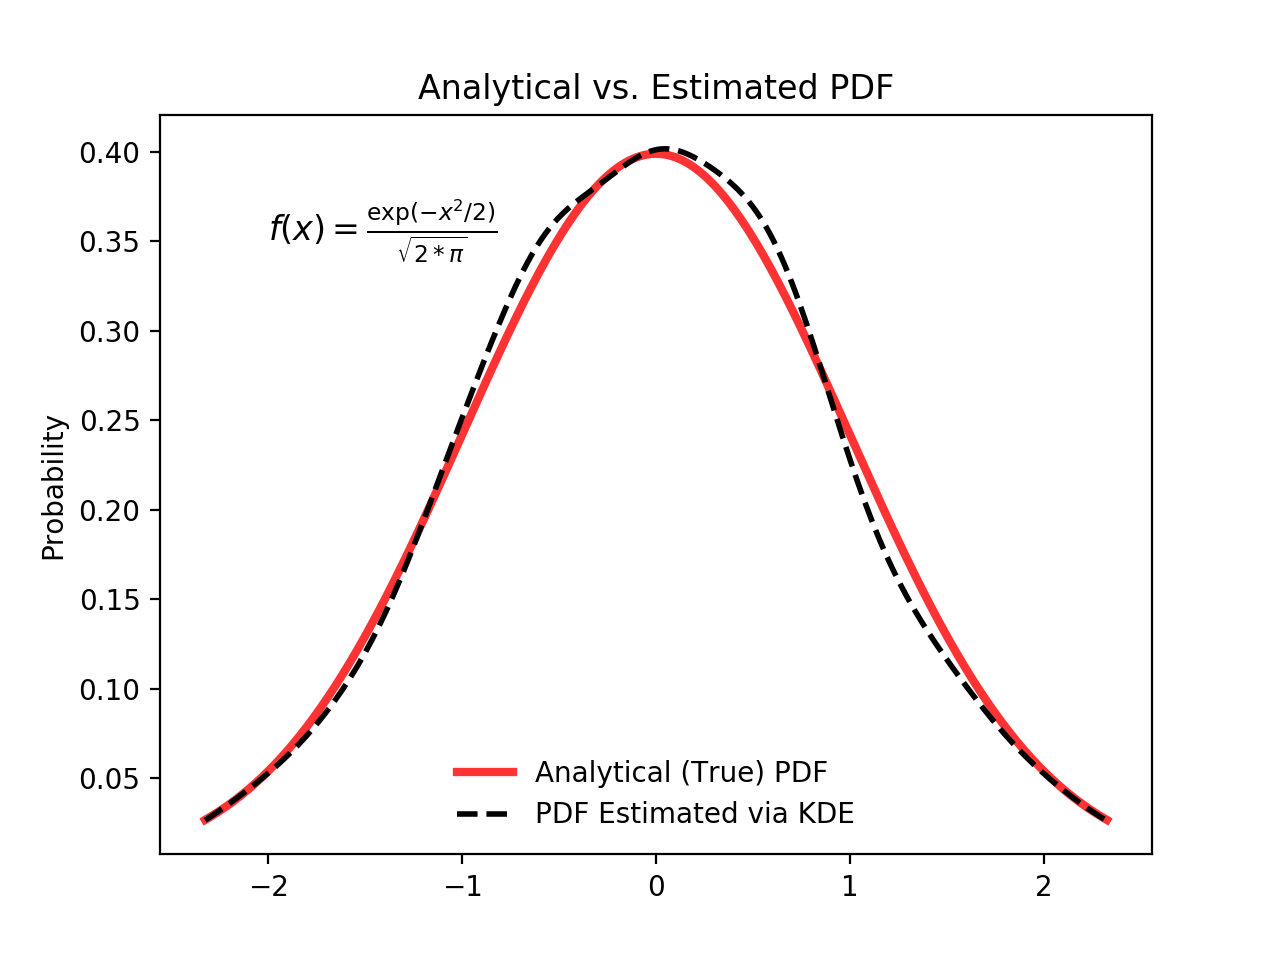
